In [127]:
import h2o
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_171"; Java(TM) SE Runtime Environment (build 1.8.0_171-b11); Java HotSpot(TM) 64-Bit Server VM (build 25.171-b11, mixed mode)
  Starting server from /Users/raj/anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/gl/wb7rqfgd3v708q5m0ydj3pkc0000gq/T/tmplw5dqjxt
  JVM stdout: /var/folders/gl/wb7rqfgd3v708q5m0ydj3pkc0000gq/T/tmplw5dqjxt/h2o_raj_started_from_python.out
  JVM stderr: /var/folders/gl/wb7rqfgd3v708q5m0ydj3pkc0000gq/T/tmplw5dqjxt/h2o_raj_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.2
H2O cluster version age:,9 days
H2O cluster name:,H2O_from_python_raj_o4us49
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [4]:
url =  "http://h2o-public-test-data.s3.amazonaws.com/smalldata/airlines/allyears2k_headers.zip"
data=h2o.import_file(url)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [5]:
train,valid,test=data.split_frame([0.8,0.1],seed=69)

In [6]:
print("%d/%d/%d" %(train.nrows,valid.nrows,test.nrows))

35255/4272/4451


In [7]:
y='IsArrDelayed' # binomial Classification
ignoreFields=['ArrDelay',
 'DepDelay','CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay','IsArrDelayed',
 'IsDepDelayed','ActualElapsedTime']

In [8]:
xAll=[i for i in train.names if i not in ignoreFields]

In [9]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [10]:
m_def= H2ODeepLearningEstimator()
%time m_def.train(xAll,y,train,validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 870 ms, sys: 133 ms, total: 1 s
Wall time: 1min 25s


In [ ]:
Model Building Time: 1min 25 seconds

In [11]:
m_def.model_performance(test)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.09340848812038584
RMSE: 0.30562802247239346
LogLoss: 0.289199594335423
Mean Per-Class Error: 0.12834661007391923
AUC: 0.9478331744225387
Gini: 0.8956663488450773
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3722098466262854: 


,NO,YES,Error,Rate
NO,1629.0,321.0,0.1646,(321.0/1950.0)
YES,259.0,2242.0,0.1036,(259.0/2501.0)
Total,1888.0,2563.0,0.1303,(580.0/4451.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3722098,0.8854660,228.0
max f2,0.1336366,0.9228163,324.0
max f0point5,0.6568810,0.9038697,130.0
max accuracy,0.4538744,0.8703662,198.0
max precision,0.9999637,1.0,0.0
max recall,0.0075042,1.0,391.0
max specificity,0.9999637,1.0,0.0
max absolute_mcc,0.4538744,0.7394671,198.0
max min_per_class_accuracy,0.4321551,0.8692308,206.0
max mean_per_class_accuracy,0.4538744,0.8716534,198.0


Gains/Lift Table: Avg response rate: 56.19 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0199955,1.0,1.7796881,1.7796881,1.0,1.0,0.0355858,0.0355858,77.9688125,77.9688125
,2,0.0204448,1.0000000,1.7796881,1.7796881,1.0,1.0,0.0007997,0.0363854,77.9688125,77.9688125
,3,0.0301056,1.0000000,1.7796881,1.7796881,1.0,1.0,0.0171931,0.0535786,77.9688125,77.9688125
,4,0.0402157,1.0000000,1.7796881,1.7796881,1.0,1.0,0.0179928,0.0715714,77.9688125,77.9688125
,5,0.0501011,0.9999999,1.7796881,1.7796881,1.0,1.0,0.0175930,0.0891643,77.9688125,77.9688125
,6,0.1002022,0.9999828,1.7796881,1.7796881,1.0,1.0,0.0891643,0.1783287,77.9688125,77.9688125
,7,0.1500786,0.9995522,1.7796881,1.7796881,1.0,1.0,0.0887645,0.2670932,77.9688125,77.9688125
,8,0.2001797,0.9970156,1.7796881,1.7796881,1.0,1.0,0.0891643,0.3562575,77.9688125,77.9688125
,9,0.3001573,0.9597240,1.7596916,1.7730276,0.9887640,0.9962575,0.1759296,0.5321871,75.9691629,77.3027615
,10,0.4001348,0.8100843,1.5797232,1.7247286,0.8876404,0.9691185,0.1579368,0.6901240,57.9723167,72.4728637


In [12]:
m_def #on the data its seen

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1529876519143_1


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.07171438946022714
RMSE: 0.26779542464393813
LogLoss: 0.22875645618083335
Mean Per-Class Error: 0.09809306408788454
AUC: 0.9687652377524013
Gini: 0.9375304755048026
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3831301621884939: 


,NO,YES,Error,Rate
NO,3954.0,540.0,0.1202,(540.0/4494.0)
YES,462.0,5016.0,0.0843,(462.0/5478.0)
Total,4416.0,5556.0,0.1005,(1002.0/9972.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3831302,0.9091898,219.0
max f2,0.1785106,0.9382526,298.0
max f0point5,0.6520562,0.9302229,133.0
max accuracy,0.4536737,0.9010229,196.0
max precision,0.9999612,1.0,0.0
max recall,0.0114046,1.0,387.0
max specificity,0.9999612,1.0,0.0
max absolute_mcc,0.4536737,0.8013154,196.0
max min_per_class_accuracy,0.4277851,0.8995984,203.0
max mean_per_class_accuracy,0.4574320,0.9019069,195.0


Gains/Lift Table: Avg response rate: 54.93 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0209587,1.0,1.8203724,1.8203724,1.0,1.0,0.0381526,0.0381526,82.0372399,82.0372399
,2,0.0300842,1.0000000,1.8203724,1.8203724,1.0,1.0,0.0166119,0.0547645,82.0372399,82.0372399
,3,0.0400120,1.0000000,1.8203724,1.8203724,1.0,1.0,0.0180723,0.0728368,82.0372399,82.0372399
,4,0.0500401,0.9999999,1.8203724,1.8203724,1.0,1.0,0.0182548,0.0910916,82.0372399,82.0372399
,5,0.1000802,0.9999878,1.8203724,1.8203724,1.0,1.0,0.0910916,0.1821833,82.0372399,82.0372399
,6,0.1500201,0.9997316,1.8203724,1.8203724,1.0,1.0,0.0909091,0.2730924,82.0372399,82.0372399
,7,0.2000602,0.9978067,1.8203724,1.8203724,1.0,1.0,0.0910916,0.3641840,82.0372399,82.0372399
,8,0.3000401,0.9707266,1.8148948,1.8185472,0.9969910,0.9989973,0.1814531,0.5456371,81.4894849,81.8547159
,9,0.4000201,0.8414012,1.7327316,1.7970986,0.9518556,0.9872148,0.1732384,0.7188755,73.2731601,79.7098648
,10,0.5,0.5296241,1.4059045,1.7188755,0.7723170,0.9442439,0.1405622,0.8594378,40.5904460,71.8875502




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.09545731573014724
RMSE: 0.30896167356186305
LogLoss: 0.2989812119827052
Mean Per-Class Error: 0.13146400571341743
AUC: 0.9446647602773282
Gini: 0.8893295205546563
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3820555273788458: 


,NO,YES,Error,Rate
NO,1636.0,297.0,0.1536,(297.0/1933.0)
YES,268.0,2071.0,0.1146,(268.0/2339.0)
Total,1904.0,2368.0,0.1323,(565.0/4272.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3820555,0.8799660,216.0
max f2,0.1649751,0.9169101,304.0
max f0point5,0.7615170,0.9024313,100.0
max accuracy,0.4536868,0.8677434,194.0
max precision,0.9999606,1.0,0.0
max recall,0.0170299,1.0,383.0
max specificity,0.9999606,1.0,0.0
max absolute_mcc,0.4536868,0.7347830,194.0
max min_per_class_accuracy,0.4288259,0.8660114,201.0
max mean_per_class_accuracy,0.4536868,0.8685360,194.0


Gains/Lift Table: Avg response rate: 54.75 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0215356,1.0,1.8264215,1.8264215,1.0,1.0,0.0393330,0.0393330,82.6421548,82.6421548
,2,0.0301966,1.0000000,1.8264215,1.8264215,1.0,1.0,0.0158187,0.0551518,82.6421548,82.6421548
,3,0.0400281,1.0000000,1.8264215,1.8264215,1.0,1.0,0.0179564,0.0731082,82.6421548,82.6421548
,4,0.0500936,0.9999999,1.8264215,1.8264215,1.0,1.0,0.0183839,0.0914921,82.6421548,82.6421548
,5,0.1001873,0.9999891,1.8264215,1.8264215,1.0,1.0,0.0914921,0.1829842,82.6421548,82.6421548
,6,0.1500468,0.9997338,1.8264215,1.8264215,1.0,1.0,0.0910646,0.2740487,82.6421548,82.6421548
,7,0.2001404,0.9974259,1.8178869,1.8242854,0.9953271,0.9988304,0.0910646,0.3651133,81.7886868,82.4285382
,8,0.3000936,0.9592906,1.7793709,1.8093256,0.9742389,0.9906396,0.1778538,0.5429671,77.9370875,80.9325558
,9,0.4000468,0.8045011,1.6168322,1.7612304,0.8852459,0.9643066,0.1616075,0.7045746,61.6832190,76.1230375
,10,0.5,0.5217464,1.2703681,1.6631039,0.6955504,0.9105805,0.1269773,0.8315519,27.0368149,66.3103891



Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_lift,validation_classification_error
,2018-06-25 03:12:07,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,2018-06-25 03:12:12,12.062 sec,3744 obs/sec,0.3517799,1,12402.0,0.4590229,0.6011396,0.1489048,0.7175109,1.8203724,0.3859807,0.4663436,0.6166705,0.1221657,0.6972407,1.8264215,0.3927903
,2018-06-25 03:13:25,1 min 25.219 sec,5223 obs/sec,10.2997022,29,363116.0,0.2677954,0.2287565,0.7103218,0.9687652,1.8203724,0.1004813,0.3089617,0.2989812,0.6146906,0.9446648,1.8264215,0.1322566


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
ArrTime,1.0,1.0,0.0021607
CRSArrTime,0.8669832,0.8669832,0.0018733
DepTime,0.6730532,0.6730532,0.0014543
CRSDepTime,0.6551669,0.6551669,0.0014156
TailNum.NA,0.5224637,0.5224637,0.0011289
---,---,---,---
TailNum.N473WN,0.1018542,0.1018542,0.0002201
TailNum.N618A<0xE4>,0.0974431,0.0974431,0.0002105
Dest.missing(NA),0.0,0.0,0.0
Origin.missing(NA),0.0,0.0,0.0



See the whole table with table.as_data_frame()


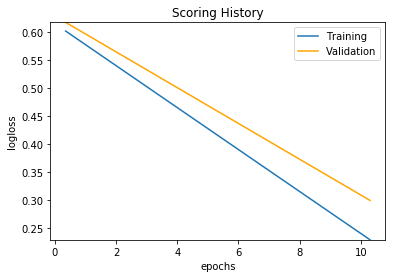

In [13]:
m_def.plot() #default epoch is 10 

In [14]:
m_200_epochs= H2ODeepLearningEstimator(epochs=200,stopping_rounds=5,stopping_tolerance=0,stopping_metric="logloss")
%time m_200_epochs.train(xAll,y,train,validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 1.95 s, sys: 199 ms, total: 2.15 s
Wall time: 8min 47s


In [ ]:
Model Building Time: 8min 47 seconds

In [15]:
m_200_epochs.model_performance(test)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.08917766216720131
RMSE: 0.29862629182173717
LogLoss: 0.27286599498117226
Mean Per-Class Error: 0.12223162017244382
AUC: 0.9552240642204656
Gini: 0.9104481284409311
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.353727350358234: 


,NO,YES,Error,Rate
NO,1664.0,286.0,0.1467,(286.0/1950.0)
YES,256.0,2245.0,0.1024,(256.0/2501.0)
Total,1920.0,2531.0,0.1218,(542.0/4451.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3537274,0.8922893,239.0
max f2,0.1467005,0.9276070,319.0
max f0point5,0.5844459,0.9124526,156.0
max accuracy,0.3537274,0.8782296,239.0
max precision,0.9999680,1.0,0.0
max recall,0.0194562,1.0,381.0
max specificity,0.9999680,1.0,0.0
max absolute_mcc,0.3988179,0.7527865,223.0
max min_per_class_accuracy,0.3959729,0.8774359,224.0
max mean_per_class_accuracy,0.3988179,0.8777684,223.0


Gains/Lift Table: Avg response rate: 56.19 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0211188,1.0,1.7796881,1.7796881,1.0,1.0,0.0375850,0.0375850,77.9688125,77.9688125
,2,0.0301056,1.0000000,1.7796881,1.7796881,1.0,1.0,0.0159936,0.0535786,77.9688125,77.9688125
,3,0.0402157,1.0000000,1.7796881,1.7796881,1.0,1.0,0.0179928,0.0715714,77.9688125,77.9688125
,4,0.0501011,0.9999999,1.7796881,1.7796881,1.0,1.0,0.0175930,0.0891643,77.9688125,77.9688125
,5,0.1002022,0.9999954,1.7796881,1.7796881,1.0,1.0,0.0891643,0.1783287,77.9688125,77.9688125
,6,0.1500786,0.9999366,1.7796881,1.7796881,1.0,1.0,0.0887645,0.2670932,77.9688125,77.9688125
,7,0.2001797,0.9991137,1.7796881,1.7796881,1.0,1.0,0.0891643,0.3562575,77.9688125,77.9688125
,8,0.3001573,0.9706806,1.7716895,1.7770239,0.9955056,0.9985030,0.1771291,0.5333866,77.1689526,77.7023921
,9,0.4001348,0.7864668,1.6117176,1.7357205,0.9056180,0.9752948,0.1611355,0.6945222,61.1717560,73.5720535
,10,0.5001123,0.5026747,1.3237680,1.6533670,0.7438202,0.9290207,0.1323471,0.8268693,32.3768021,65.3367045


In [16]:
m_200_epochs

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1529876519143_7


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.06801733624736912
RMSE: 0.2608013348266629
LogLoss: 0.21648343715378993
Mean Per-Class Error: 0.09102342137664587
AUC: 0.9735486057520287
Gini: 0.9470972115040575
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3280316462589536: 


,NO,YES,Error,Rate
NO,4003.0,579.0,0.1264,(579.0/4582.0)
YES,375.0,5172.0,0.0676,(375.0/5547.0)
Total,4378.0,5751.0,0.0942,(954.0/10129.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3280316,0.9155603,241.0
max f2,0.1911255,0.9405198,294.0
max f0point5,0.5832442,0.9376393,154.0
max accuracy,0.3803677,0.9073946,222.0
max precision,0.9999630,1.0,0.0
max recall,0.0290930,1.0,374.0
max specificity,0.9999630,1.0,0.0
max absolute_mcc,0.4647174,0.8145551,195.0
max min_per_class_accuracy,0.3948329,0.9060754,217.0
max mean_per_class_accuracy,0.4647174,0.9089766,195.0


Gains/Lift Table: Avg response rate: 54.76 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0199427,1.0,1.8260321,1.8260321,1.0,1.0,0.0364161,0.0364161,82.6032089,82.6032089
,2,0.0200415,1.0000000,1.8260321,1.8260321,1.0,1.0,0.0001803,0.0365964,82.6032089,82.6032089
,3,0.0300128,1.0000000,1.8260321,1.8260321,1.0,1.0,0.0182080,0.0548044,82.6032089,82.6032089
,4,0.0400829,1.0000000,1.8260321,1.8260321,1.0,1.0,0.0183883,0.0731927,82.6032089,82.6032089
,5,0.0500543,0.9999999,1.8260321,1.8260321,1.0,1.0,0.0182080,0.0914008,82.6032089,82.6032089
,6,0.1000099,0.9999954,1.8260321,1.8260321,1.0,1.0,0.0912205,0.1826212,82.6032089,82.6032089
,7,0.1500642,0.9999362,1.8260321,1.8260321,1.0,1.0,0.0914008,0.2740220,82.6032089,82.6032089
,8,0.2000197,0.9992276,1.8260321,1.8260321,1.0,1.0,0.0912205,0.3652425,82.6032089,82.6032089
,9,0.3000296,0.9728382,1.8170191,1.8230278,0.9950642,0.9983547,0.1817198,0.5469623,81.7019098,82.3027759
,10,0.4000395,0.8047605,1.7701515,1.8098087,0.9693978,0.9911155,0.1770326,0.7239950,77.0151542,80.9808705




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.0904372887318601
RMSE: 0.3007279314128638
LogLoss: 0.28021155387555136
Mean Per-Class Error: 0.11885775001675403
AUC: 0.9532455028844663
Gini: 0.9064910057689326
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.28459720655547177: 


,NO,YES,Error,Rate
NO,1582.0,351.0,0.1816,(351.0/1933.0)
YES,188.0,2151.0,0.0804,(188.0/2339.0)
Total,1770.0,2502.0,0.1262,(539.0/4272.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2845972,0.8886594,256.0
max f2,0.0972279,0.9210421,335.0
max f0point5,0.5243182,0.9093509,169.0
max accuracy,0.4215615,0.8789794,206.0
max precision,0.9999760,1.0,0.0
max recall,0.0159271,1.0,381.0
max specificity,0.9999760,1.0,0.0
max absolute_mcc,0.4435971,0.7590179,199.0
max min_per_class_accuracy,0.3838118,0.8773927,220.0
max mean_per_class_accuracy,0.4435971,0.8811422,199.0


Gains/Lift Table: Avg response rate: 54.75 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0227060,1.0,1.8264215,1.8264215,1.0,1.0,0.0414707,0.0414707,82.6421548,82.6421548
,2,0.0301966,1.0000000,1.8264215,1.8264215,1.0,1.0,0.0136811,0.0551518,82.6421548,82.6421548
,3,0.0400281,1.0000000,1.8264215,1.8264215,1.0,1.0,0.0179564,0.0731082,82.6421548,82.6421548
,4,0.0500936,1.0000000,1.8264215,1.8264215,1.0,1.0,0.0183839,0.0914921,82.6421548,82.6421548
,5,0.1001873,0.9999969,1.8264215,1.8264215,1.0,1.0,0.0914921,0.1829842,82.6421548,82.6421548
,6,0.1500468,0.9999594,1.8264215,1.8264215,1.0,1.0,0.0910646,0.2740487,82.6421548,82.6421548
,7,0.2001404,0.9993049,1.8264215,1.8264215,1.0,1.0,0.0914921,0.3655408,82.6421548,82.6421548
,8,0.3000936,0.9695154,1.8007575,1.8178736,0.9859485,0.9953198,0.1799914,0.5455323,80.0757545,81.7873553
,9,0.4000468,0.7723356,1.6296642,1.7708487,0.8922717,0.9695728,0.1628901,0.7084224,62.9664191,77.0848745
,10,0.5,0.4655726,1.3259735,1.6819153,0.7259953,0.9208801,0.1325353,0.8409577,32.5973489,68.1915348



Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_lift,validation_classification_error
,2018-06-25 03:13:36,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,2018-06-25 03:13:38,8.960 sec,3130 obs/sec,0.2251028,1,7936.0,0.4870113,0.6656621,0.0425899,0.7207516,1.8260321,0.3745681,0.4913102,0.6764610,0.0256569,0.7057026,1.8264215,0.3862360
,2018-06-25 03:14:42,1 min 13.089 sec,5552 obs/sec,9.4215572,42,332157.0,0.2608013,0.2164834,0.7254386,0.9735486,1.8260321,0.0941850,0.3007279,0.2802116,0.6349537,0.9532455,1.8264215,0.1261704
,2018-06-25 03:15:51,2 min 20.030 sec,5626 obs/sec,19.5009219,87,687505.0,0.2402027,0.1789403,0.7670966,0.9893329,1.8260321,0.0541021,0.3100898,0.3095592,0.6118716,0.9627931,1.8264215,0.1055712
,2018-06-25 03:16:38,3 min 7.149 sec,5616 obs/sec,26.2301234,117,924743.0,0.2076741,0.1361477,0.8259057,0.9932308,1.8260321,0.0425511,0.3044612,0.3372614,0.6258340,0.9607125,1.8264215,0.1069757
,2018-06-25 03:17:26,3 min 54.848 sec,5631 obs/sec,33.1708127,148,1169437.0,0.1954874,0.1217299,0.8457386,0.9956329,1.8260321,0.0349492,0.3101265,0.4025770,0.6117799,0.9589496,1.8264215,0.1039326
,2018-06-25 03:18:14,4 min 42.766 sec,5635 obs/sec,40.1092895,179,1414053.0,0.1459917,0.0705546,0.9139648,0.9971435,1.8260321,0.0279396,0.2951825,0.4426381,0.6482926,0.9544101,1.8264215,0.1036985
,2018-06-25 03:19:01,5 min 30.441 sec,5614 obs/sec,46.8124805,209,1650374.0,0.1408903,0.0656799,0.9198724,0.9979528,1.8260321,0.0231020,0.2933162,0.4595213,0.6527258,0.9536728,1.8264215,0.1044007
,2018-06-25 03:19:48,6 min 17.346 sec,5592 obs/sec,53.3261381,238,1880013.0,0.1286601,0.0563776,0.9331798,0.9982646,1.8260321,0.0193504,0.2961646,0.5356804,0.6459483,0.9504006,1.8235408,0.1036985
,2018-06-25 03:20:36,7 min 4.842 sec,5568 obs/sec,59.8222096,267,2109032.0,0.1263827,0.0535049,0.9355245,0.9984627,1.8260321,0.0197453,0.2976703,0.5849173,0.6423391,0.9467777,1.8238309,0.1055712


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
ArrTime,1.0,1.0,0.0020700
CRSArrTime,0.9233475,0.9233475,0.0019113
DepTime,0.6727085,0.6727085,0.0013925
CRSDepTime,0.6114694,0.6114694,0.0012657
AirTime,0.5077853,0.5077853,0.0010511
---,---,---,---
TailNum.N782SA,0.1062474,0.1062474,0.0002199
TailNum.N813AW,0.1056661,0.1056661,0.0002187
Dest.missing(NA),0.0,0.0,0.0
Origin.missing(NA),0.0,0.0,0.0



See the whole table with table.as_data_frame()


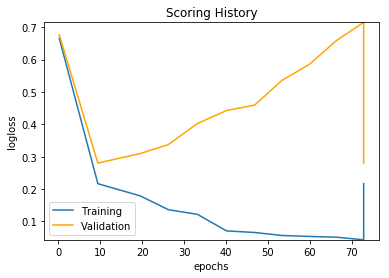

In [17]:
m_200_epochs.plot() #overfitting

Tuning idea : Does another Layer helps ? 

In [20]:
m_200x200x200= H2ODeepLearningEstimator(epochs=200,
                                       #Same early stopping as it is default
                                       hidden=[200,200,200])
%time m_200x200x200.train(xAll,y,train,validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 1.83 s, sys: 182 ms, total: 2.01 s
Wall time: 8min 49s


Model Building Time: 8min 49 seconds

In [21]:
m_200x200x200.model_performance(test)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.09166490194096985
RMSE: 0.3027621210471512
LogLoss: 0.30701643402864787
Mean Per-Class Error: 0.12191513138334409
AUC: 0.9517772378228196
Gini: 0.9035544756456393
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2997237719048822: 


,NO,YES,Error,Rate
NO,1625.0,325.0,0.1667,(325.0/1950.0)
YES,227.0,2274.0,0.0908,(227.0/2501.0)
Total,1852.0,2599.0,0.124,(552.0/4451.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2997238,0.8917647,257.0
max f2,0.0330450,0.9234522,368.0
max f0point5,0.6129411,0.9139588,149.0
max accuracy,0.3121781,0.8762076,252.0
max precision,0.9999833,0.9990282,0.0
max recall,0.0001156,1.0,399.0
max specificity,0.9999833,0.9994872,0.0
max absolute_mcc,0.5345320,0.7503543,177.0
max min_per_class_accuracy,0.3931723,0.8736505,224.0
max mean_per_class_accuracy,0.5345320,0.8780849,177.0


Gains/Lift Table: Avg response rate: 56.19 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0186475,1.0,1.7796881,1.7796881,1.0,1.0,0.0331867,0.0331867,77.9688125,77.9688125
,2,0.0202202,1.0000000,1.7796881,1.7796881,1.0,1.0,0.0027989,0.0359856,77.9688125,77.9688125
,3,0.0301056,1.0000000,1.7796881,1.7796881,1.0,1.0,0.0175930,0.0535786,77.9688125,77.9688125
,4,0.0402157,1.0000000,1.7796881,1.7796881,1.0,1.0,0.0179928,0.0715714,77.9688125,77.9688125
,5,0.0501011,1.0000000,1.7796881,1.7796881,1.0,1.0,0.0175930,0.0891643,77.9688125,77.9688125
,6,0.1002022,1.0000000,1.7796881,1.7796881,1.0,1.0,0.0891643,0.1783287,77.9688125,77.9688125
,7,0.1500786,0.9999996,1.7796881,1.7796881,1.0,1.0,0.0887645,0.2670932,77.9688125,77.9688125
,8,0.2001797,0.9999702,1.7796881,1.7796881,1.0,1.0,0.0891643,0.3562575,77.9688125,77.9688125
,9,0.3001573,0.9875707,1.7476937,1.7690313,0.9820225,0.9940120,0.1747301,0.5309876,74.7693731,76.9031310
,10,0.4001348,0.8154356,1.6397127,1.7367198,0.9213483,0.9758563,0.1639344,0.6949220,63.9712654,73.6719798


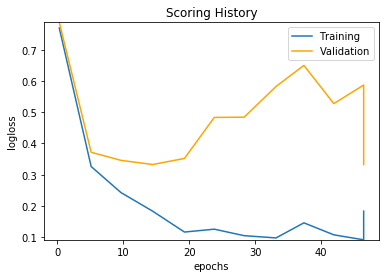

In [22]:
m_200x200x200.plot()

In [23]:
m_200x200x200

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1529876519143_83


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.056320554312119825
RMSE: 0.23731951945029686
LogLoss: 0.18349903925371555
Mean Per-Class Error: 0.07254156522630684
AUC: 0.9813151981576332
Gini: 0.9626303963152665
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3685781828585548: 


,NO,YES,Error,Rate
NO,4037.0,406.0,0.0914,(406.0/4443.0)
YES,321.0,5290.0,0.0572,(321.0/5611.0)
Total,4358.0,5696.0,0.0723,(727.0/10054.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3685782,0.9357035,238.0
max f2,0.1611983,0.9534103,313.0
max f0point5,0.5843758,0.9473582,166.0
max accuracy,0.4003168,0.9282872,227.0
max precision,0.9999880,0.9995712,0.0
max recall,0.0006222,1.0,398.0
max specificity,0.9999880,0.9997749,0.0
max absolute_mcc,0.4003168,0.8546595,227.0
max min_per_class_accuracy,0.4250018,0.9260381,219.0
max mean_per_class_accuracy,0.4003168,0.9274584,227.0


Gains/Lift Table: Avg response rate: 55.81 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0192958,1.0,1.7918375,1.7918375,1.0,1.0,0.0345749,0.0345749,79.1837462,79.1837462
,2,0.0200915,1.0000000,1.7918375,1.7918375,1.0,1.0,0.0014258,0.0360007,79.1837462,79.1837462
,3,0.0300378,1.0000000,1.7918375,1.7918375,1.0,1.0,0.0178221,0.0538228,79.1837462,79.1837462
,4,0.0400835,1.0000000,1.7918375,1.7918375,1.0,1.0,0.0180004,0.0718232,79.1837462,79.1837462
,5,0.0500298,1.0000000,1.7918375,1.7918375,1.0,1.0,0.0178221,0.0896453,79.1837462,79.1837462
,6,0.1000597,1.0000000,1.7918375,1.7918375,1.0,1.0,0.0896453,0.1792907,79.1837462,79.1837462
,7,0.1499901,0.9999996,1.7918375,1.7918375,1.0,1.0,0.0894671,0.2687578,79.1837462,79.1837462
,8,0.2000199,0.9999783,1.7918375,1.7918375,1.0,1.0,0.0896453,0.3584031,79.1837462,79.1837462
,9,0.2999801,0.9933565,1.7829228,1.7888669,0.9950249,0.9983422,0.1782214,0.5366245,78.2922848,78.8866909
,10,0.4000398,0.8755864,1.7651202,1.7829273,0.9850895,0.9950273,0.1766174,0.7132418,76.5120204,78.2927281




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.09806416166794199
RMSE: 0.31315197854706583
LogLoss: 0.3327197540773978
Mean Per-Class Error: 0.12720338257668673
AUC: 0.9439774559765837
Gini: 0.8879549119531673
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39308791117014685: 


,NO,YES,Error,Rate
NO,1663.0,270.0,0.1397,(270.0/1933.0)
YES,286.0,2053.0,0.1223,(286.0/2339.0)
Total,1949.0,2323.0,0.1301,(556.0/4272.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3930879,0.8807379,225.0
max f2,0.0249481,0.9140426,372.0
max f0point5,0.6219470,0.9035676,150.0
max accuracy,0.4761788,0.8707865,195.0
max precision,0.9999850,0.9989950,0.0
max recall,0.0001275,1.0,399.0
max specificity,0.9999850,0.9994827,0.0
max absolute_mcc,0.4761788,0.7425213,195.0
max min_per_class_accuracy,0.4121361,0.8675634,216.0
max mean_per_class_accuracy,0.4761788,0.8727966,195.0


Gains/Lift Table: Avg response rate: 54.75 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0205993,1.0,1.8264215,1.8264215,1.0,1.0,0.0376229,0.0376229,82.6421548,82.6421548
,2,0.0301966,1.0000000,1.8264215,1.8264215,1.0,1.0,0.0175289,0.0551518,82.6421548,82.6421548
,3,0.0400281,1.0000000,1.8264215,1.8264215,1.0,1.0,0.0179564,0.0731082,82.6421548,82.6421548
,4,0.0500936,1.0000000,1.8264215,1.8264215,1.0,1.0,0.0183839,0.0914921,82.6421548,82.6421548
,5,0.1001873,1.0000000,1.8264215,1.8264215,1.0,1.0,0.0914921,0.1829842,82.6421548,82.6421548
,6,0.1500468,0.9999997,1.8264215,1.8264215,1.0,1.0,0.0910646,0.2740487,82.6421548,82.6421548
,7,0.2001404,0.9999773,1.8264215,1.8264215,1.0,1.0,0.0914921,0.3655408,82.6421548,82.6421548
,8,0.3000936,0.9849122,1.7665389,1.8064762,0.9672131,0.9890796,0.1765712,0.5421120,76.6538874,80.6476227
,9,0.4000468,0.8113223,1.5954455,1.7537494,0.8735363,0.9602106,0.1594699,0.7015819,59.5445521,75.3749421
,10,0.5,0.5165958,1.3473602,1.6725096,0.7377049,0.9157303,0.1346729,0.8362548,34.7360158,67.2509619



Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_lift,validation_classification_error
,2018-06-25 03:40:09,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,2018-06-25 03:40:13,9.774 sec,2450 obs/sec,0.3005815,1,10597.0,0.5099460,0.7692335,-0.0544100,0.6871979,1.7918375,0.4057092,0.5126886,0.7873675,-0.0609812,0.6738278,1.8264215,0.4344569
,2018-06-25 03:41:09,1 min 5.147 sec,3294 obs/sec,5.1309885,17,180893.0,0.3257559,0.3262880,0.5697254,0.9368758,1.7918375,0.1565546,0.3483240,0.3717816,0.5102581,0.9151534,1.8264215,0.1741573
,2018-06-25 03:41:59,1 min 54.825 sec,3415 obs/sec,9.6524181,32,340296.0,0.2813600,0.2429084,0.6790142,0.9738882,1.7918375,0.0899145,0.3319746,0.3459581,0.5551535,0.9402012,1.8264215,0.1439607
,2018-06-25 03:42:51,2 min 47.091 sec,3472 obs/sec,14.4522479,48,509514.0,0.2373195,0.1834990,0.7716358,0.9813152,1.7918375,0.0723095,0.3131520,0.3327198,0.6041682,0.9439775,1.8264215,0.1301498
,2018-06-25 03:43:43,3 min 38.814 sec,3510 obs/sec,19.2726989,64,679459.0,0.1875245,0.1167430,0.8574139,0.9920995,1.7918375,0.0466481,0.3004637,0.3521733,0.6355948,0.9494753,1.8264215,0.1161049
,2018-06-25 03:44:32,4 min 28.000 sec,3526 obs/sec,23.7920862,79,838790.0,0.1974178,0.1259172,0.8419722,0.9902296,1.7918375,0.0529143,0.3230248,0.4833588,0.5788158,0.9367837,1.8264215,0.1320225
,2018-06-25 03:45:22,5 min 18.318 sec,3525 obs/sec,28.3154163,94,998260.0,0.1805019,0.1051820,0.8678934,0.9941952,1.7918375,0.0398846,0.3113268,0.4840689,0.6087689,0.9421701,1.8264215,0.1170412
,2018-06-25 03:46:15,6 min 10.885 sec,3533 obs/sec,33.1520919,110,1168777.0,0.1724872,0.0979282,0.8793645,0.9955374,1.7918375,0.0343147,0.3227887,0.5822544,0.5794311,0.9396089,1.8264215,0.1189139
,2018-06-25 03:47:04,7 min 0.287 sec,3512 obs/sec,37.3786130,124,1317783.0,0.2063043,0.1461835,0.8274250,0.9917342,1.7918375,0.0429680,0.3330547,0.6497426,0.5522543,0.9382163,1.8264215,0.1228933


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
ArrTime,1.0,1.0,0.0042562
CRSArrTime,0.9063724,0.9063724,0.0038577
CRSDepTime,0.6789995,0.6789995,0.0028899
DepTime,0.6144415,0.6144415,0.0026152
TailNum.NA,0.5461983,0.5461983,0.0023247
---,---,---,---
TailNum.N664UA,0.0451967,0.0451967,0.0001924
TailNum.N413AA,0.0443478,0.0443478,0.0001888
Dest.missing(NA),0.0,0.0,0.0
Origin.missing(NA),0.0,0.0,0.0



See the whole table with table.as_data_frame()


In [24]:
# sticking with two layers and doubling the neurons in each layer

In [25]:
m_400x400= H2ODeepLearningEstimator(epochs=200,
                                       #Same early stopping as it is default
                                       hidden=[400,400])
%time m_400x400.train(xAll,y,train,validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 4.02 s, sys: 395 ms, total: 4.42 s
Wall time: 19min 26s


Model Building Time: 16min 26seconds

In [26]:
m_400x400.model_performance(test)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.09266793918939957
RMSE: 0.3044140916406459
LogLoss: 0.30828911627666566
Mean Per-Class Error: 0.12154492049334109
AUC: 0.9539155619803361
Gini: 0.9078311239606722
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5938319943538659: 


,NO,YES,Error,Rate
NO,1619.0,331.0,0.1697,(331.0/1950.0)
YES,200.0,2301.0,0.08,(200.0/2501.0)
Total,1819.0,2632.0,0.1193,(531.0/4451.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.5938320,0.8965517,178.0
max f2,0.2685210,0.9287678,281.0
max f0point5,0.9160883,0.9105722,57.0
max accuracy,0.5990044,0.8807010,177.0
max precision,0.9999850,0.9981802,0.0
max recall,0.0014139,1.0,395.0
max specificity,0.9999850,0.9989744,0.0
max absolute_mcc,0.5938320,0.7572566,178.0
max min_per_class_accuracy,0.7204757,0.8784486,135.0
max mean_per_class_accuracy,0.7204757,0.8784551,135.0


Gains/Lift Table: Avg response rate: 56.19 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0352730,1.0,1.7796881,1.7796881,1.0,1.0,0.0627749,0.0627749,77.9688125,77.9688125
,2,0.0402157,1.0000000,1.7796881,1.7796881,1.0,1.0,0.0087965,0.0715714,77.9688125,77.9688125
,3,0.0501011,1.0000000,1.7796881,1.7796881,1.0,1.0,0.0175930,0.0891643,77.9688125,77.9688125
,4,0.1002022,1.0000000,1.7796881,1.7796881,1.0,1.0,0.0891643,0.1783287,77.9688125,77.9688125
,5,0.1500786,0.9999995,1.7796881,1.7796881,1.0,1.0,0.0887645,0.2670932,77.9688125,77.9688125
,6,0.2001797,0.9999859,1.7717075,1.7776907,0.9955157,0.9988777,0.0887645,0.3558577,77.1707461,77.7690719
,7,0.3001573,0.9978639,1.7556923,1.7703634,0.9865169,0.9947605,0.1755298,0.5313874,75.5692330,77.0363412
,8,0.4001348,0.9649751,1.6077183,1.7297250,0.9033708,0.9719259,0.1607357,0.6921232,60.7718261,72.9724954
,9,0.5001123,0.8224268,1.3597617,1.6557655,0.7640449,0.9303684,0.1359456,0.8280688,35.9761713,65.5765546
,10,0.6000899,0.5638919,0.9678304,1.5411526,0.5438202,0.8659678,0.0967613,0.9248301,-3.2169604,54.1152614


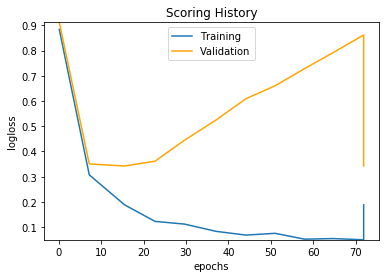

In [27]:
m_400x400.plot()

In [28]:
m_400x400

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1529876519143_109


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.059580784654206326
RMSE: 0.2440917545805395
LogLoss: 0.18856760589307767
Mean Per-Class Error: 0.07089554473302662
AUC: 0.9831388526891259
Gini: 0.9662777053782519
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7072332233210687: 


,NO,YES,Error,Rate
NO,4148.0,315.0,0.0706,(315.0/4463.0)
YES,397.0,5178.0,0.0712,(397.0/5575.0)
Total,4545.0,5493.0,0.0709,(712.0/10038.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.7072332,0.9356704,130.0
max f2,0.3930598,0.9551677,236.0
max f0point5,0.8467875,0.9510222,82.0
max accuracy,0.7072332,0.9290695,130.0
max precision,0.9999794,1.0,0.0
max recall,0.0109596,1.0,387.0
max specificity,0.9999794,1.0,0.0
max absolute_mcc,0.7072332,0.8567560,130.0
max min_per_class_accuracy,0.7072332,0.9287892,130.0
max mean_per_class_accuracy,0.7072332,0.9291045,130.0


Gains/Lift Table: Avg response rate: 55.54 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0365611,1.0,1.8005381,1.8005381,1.0,1.0,0.0658296,0.0658296,80.0538117,80.0538117
,2,0.0403467,1.0000000,1.8005381,1.8005381,1.0,1.0,0.0068161,0.0726457,80.0538117,80.0538117
,3,0.0500100,1.0000000,1.8005381,1.8005381,1.0,1.0,0.0173991,0.0900448,80.0538117,80.0538117
,4,0.1000199,1.0000000,1.8005381,1.8005381,1.0,1.0,0.0900448,0.1800897,80.0538117,80.0538117
,5,0.1500299,0.9999997,1.8005381,1.8005381,1.0,1.0,0.0900448,0.2701345,80.0538117,80.0538117
,6,0.2000398,0.9999876,1.8005381,1.8005381,1.0,1.0,0.0900448,0.3601794,80.0538117,80.0538117
,7,0.3000598,0.9987725,1.8005381,1.8005381,1.0,1.0,0.1800897,0.5402691,80.0538117,80.0538117
,8,0.3999801,0.9775156,1.7861769,1.7969505,0.9920239,0.9980075,0.1784753,0.7187444,78.6176895,79.6950494
,9,0.5,0.8420642,1.5620206,1.7499552,0.8675299,0.9719068,0.1562332,0.8749776,56.2020617,74.9955157
,10,0.6000199,0.5350334,0.9092359,1.6098120,0.5049801,0.8940727,0.0909417,0.9659193,-9.0764118,60.9812014




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.09989803487181408
RMSE: 0.316066503875077
LogLoss: 0.3422899694763406
Mean Per-Class Error: 0.12263720484897334
AUC: 0.9480759571334445
Gini: 0.896151914266889
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6870341148824416: 


,NO,YES,Error,Rate
NO,1667.0,266.0,0.1376,(266.0/1933.0)
YES,264.0,2075.0,0.1129,(264.0/2339.0)
Total,1931.0,2341.0,0.1241,(530.0/4272.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.6870341,0.8867521,143.0
max f2,0.2433378,0.9192042,290.0
max f0point5,0.9283702,0.9041517,50.0
max accuracy,0.7139116,0.8768727,133.0
max precision,0.9999853,0.9951124,0.0
max recall,0.0038920,1.0,394.0
max specificity,0.9999853,0.9974133,0.0
max absolute_mcc,0.7139116,0.7521161,133.0
max min_per_class_accuracy,0.7201760,0.8755879,131.0
max mean_per_class_accuracy,0.7893028,0.8773628,108.0


Gains/Lift Table: Avg response rate: 54.75 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0386236,1.0,1.8264215,1.8264215,1.0,1.0,0.0705430,0.0705430,82.6421548,82.6421548
,2,0.0407303,1.0000000,1.8264215,1.8264215,1.0,1.0,0.0038478,0.0743908,82.6421548,82.6421548
,3,0.0500936,1.0000000,1.8264215,1.8264215,1.0,1.0,0.0171013,0.0914921,82.6421548,82.6421548
,4,0.1001873,1.0000000,1.8264215,1.8264215,1.0,1.0,0.0914921,0.1829842,82.6421548,82.6421548
,5,0.1500468,0.9999998,1.8264215,1.8264215,1.0,1.0,0.0910646,0.2740487,82.6421548,82.6421548
,6,0.2001404,0.9999853,1.8178869,1.8242854,0.9953271,0.9988304,0.0910646,0.3651133,81.7886868,82.4285382
,7,0.3000936,0.9979566,1.7622615,1.8036269,0.9648712,0.9875195,0.1761437,0.5412569,76.2261540,80.3626895
,8,0.4000468,0.9635408,1.6082775,1.7548181,0.8805621,0.9607958,0.1607525,0.7020094,60.8277522,75.4818128
,9,0.5,0.8148075,1.3601922,1.6759299,0.7447307,0.9176030,0.1359555,0.8379649,36.0192160,67.5929885
,10,0.5999532,0.5195666,0.8640214,1.5406646,0.4730679,0.8435427,0.0863617,0.9243266,-13.5978565,54.0664606



Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_lift,validation_classification_error
,2018-06-25 03:49:49,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,2018-06-25 03:49:52,14.319 sec,1134 obs/sec,0.1082116,1,3815.0,0.5429824,0.8832042,-0.1939722,0.6410194,1.8005381,0.4412234,0.5520363,0.9115628,-0.2300868,0.6269436,1.8264215,0.4524813
,2018-06-25 03:51:42,2 min 6.209 sec,2475 obs/sec,7.1813076,69,253177.0,0.3165548,0.3074543,0.5941921,0.9551753,1.8005381,0.1211397,0.3390064,0.3506310,0.5361088,0.9355536,1.8264215,0.1500468
,2018-06-25 03:53:53,4 min 15.781 sec,2477 obs/sec,15.5051482,149,546634.0,0.2440918,0.1885676,0.7587158,0.9831389,1.8005381,0.0709305,0.3160665,0.3422900,0.5967658,0.9480760,1.8264215,0.1240637
,2018-06-25 03:55:46,6 min 8.024 sec,2486 obs/sec,22.6906254,218,799958.0,0.1960993,0.1229900,0.8442691,0.9909189,1.8005381,0.0541941,0.3048394,0.3615178,0.6249037,0.9525768,1.8264215,0.1221910
,2018-06-25 03:57:37,7 min 59.928 sec,2477 obs/sec,29.6755637,285,1046212.0,0.1868639,0.1121889,0.8585922,0.9924766,1.8005381,0.0476190,0.3139473,0.4448362,0.6021550,0.9455544,1.8264215,0.1280431
,2018-06-25 03:59:33,9 min 54.889 sec,2484 obs/sec,37.0889236,356,1307570.0,0.1605353,0.0835093,0.8956329,0.9966233,1.8005381,0.0291891,0.3104472,0.5246365,0.6109765,0.9465204,1.8264215,0.1168071
,2018-06-25 04:01:23,11 min 45.770 sec,2486 obs/sec,44.1423628,424,1556239.0,0.1437171,0.0686848,0.9163551,0.9972397,1.8005381,0.0263997,0.3116090,0.6090554,0.6080592,0.9438668,1.8264215,0.1151685
,2018-06-25 04:03:16,13 min 38.093 sec,2474 obs/sec,51.0183520,490,1798652.0,0.1525167,0.0756920,0.9057986,0.9972381,1.8005381,0.0283921,0.3158974,0.6602574,0.5971972,0.9396234,1.8264215,0.1137640
,2018-06-25 04:05:09,15 min 30.932 sec,2466 obs/sec,57.9739328,557,2043871.0,0.1278042,0.0524872,0.9338525,0.9983152,1.8005381,0.0227137,0.3108902,0.7282794,0.6098654,0.9415411,1.8244492,0.1121255


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
ArrTime,1.0,1.0,0.0018182
CRSArrTime,0.9013873,0.9013873,0.0016389
DepTime,0.6633399,0.6633399,0.0012061
CRSDepTime,0.6506033,0.6506033,0.0011830
TailNum.NA,0.5013327,0.5013327,0.0009115
---,---,---,---
TailNum.N472AA,0.1256116,0.1256116,0.0002284
TailNum.N200WN,0.1255245,0.1255245,0.0002282
Dest.missing(NA),0.0,0.0,0.0
Origin.missing(NA),0.0,0.0,0.0



See the whole table with table.as_data_frame()


Why three layer neurons is quicker than 2 layer neuron ?

Why did it take longer ?

In [30]:
m_def.summary() #800k weights

Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 801,202 weights/biases, 9.2 MB, 363,116 training samples, mini-batch size 1



,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
,1,3802,Input,0.0,,,,,,,,,
,2,200,Rectifier,0.0,0.0,0.0,0.5234414,0.4771924,0.0,0.0001009,0.0254511,-0.3309801,0.2242589
,3,200,Rectifier,0.0,0.0,0.0,0.2961834,0.3685958,0.0,-0.0070119,0.0893284,-0.0222179,0.2433962
,4,2,Softmax,,0.0,0.0,0.0257978,0.0649899,0.0,0.0042965,0.3348324,0.0276584,0.4522240


In [31]:
m_def.summary()['units']

[3802, 200, 200, 2]

In [32]:
# this gives number of weights plus biases
(3802 * 200) + (200 * 200)+(200 * 2) #Plus 200 +200+ 2 biases

800800

In [33]:
m_200x200x200.summary()

Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 841,402 weights/biases, 9.7 MB, 1,637,162 training samples, mini-batch size 1



,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
,1,3802,Input,0.0,,,,,,,,,
,2,200,Rectifier,0.0,0.0,0.0,0.1201443,0.2814668,0.0,-0.0005121,0.0319420,-0.1536235,0.3961180
,3,200,Rectifier,0.0,0.0,0.0,0.0376978,0.0818093,0.0,-0.0357392,0.0917043,0.7239650,0.1080936
,4,200,Rectifier,0.0,0.0,0.0,0.1320740,0.1975344,0.0,-0.0065727,0.0798736,-0.1623716,0.2204847
,5,2,Softmax,,0.0,0.0,0.0211679,0.0547472,0.0,0.0083639,0.3016576,-0.0052966,0.2901752


In [34]:
m_400x400.summary()['units'] # has double the number of weights thats why it took more time to build

[3802, 400, 400, 2]

In [36]:
m_400x400.summary() # 1.6 million weights

Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 1,682,402 weights/biases, 19.3 MB, 2,535,255 training samples, mini-batch size 1



,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
,1,3802,Input,0.0,,,,,,,,,
,2,400,Rectifier,0.0,0.0,0.0,0.5280311,0.4748262,0.0,0.0000408,0.0253470,-0.3096682,0.1888503
,3,400,Rectifier,0.0,0.0,0.0,0.3318304,0.3663535,0.0,-0.0096166,0.0630659,-0.0590029,0.2950772
,4,2,Softmax,,0.0,0.0,0.0317337,0.0718888,0.0,-0.0094838,0.2417504,-0.0119784,0.7799013


In [38]:
train.nlevels() #enum cardinality 0-normal, more than 0- categorical 

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 3501,
 0,
 0,
 0,
 0,
 0,
 132,
 134,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2]

We are doing this to find out which column has so many categories for ex: 3000

In [39]:
train.structure() #tailnum has 3501 levels , Origin and Destination with 132 levels

H2OFrame: 'py_3_sid_bcfc' 
Dimensions: 35255 obs. of 31 variables
$ Year              :  num 1987 1987 1987 1987 1987 1987 1987 1987 1987 1987
$ Month             :  num 10 10 10 10 10 10 10 10 10 10
$ DayofMonth        :  num 14 15 17 18 22 23 24 25 26 28
$ DayOfWeek         :  num 3 4 6 7 4 5 6 7 1 3
$ DepTime           :  num 741 729 741 729 728 731 744 729 735 741
$ CRSDepTime        :  num 730 730 730 730 730 730 730 730 730 725
$ ArrTime           :  num 912 903 918 847 852 902 908 851 904 919
$ CRSArrTime        :  num 849 849 849 849 849 849 849 849 849 855
$ UniqueCarrier     :  Factor w/ 10 level(s) "AA","CO","DL","HP","PI","PS","TW","UA","US","WN" 
$ FlightNum         :  num 1451 1451 1451 1451 1451 1451 1451 1451 1451 1451


$ TailNum           :  Factor w/ 3501 level(s) "-N912<0xE5>","-N913<0xE5>","-N918<0xE5>","-N919<0xE5>","-N920<0xE5>","-N922<0xE5>","-N923<0xE5>","-N924<0xE5>","-N925<0xE5>","-N926<0xE5>","-N927<0xE5>","-N928<0xE5>","-N934<0xE5>","-N936<0xE5>","-N955<0xE5>","-N958<0xE5>","-N959<0xE5>","-N965<0xE5>","-N967<0xE5>","-N970<0xE5>","-N991<0xE5>","0","000000","112","<0xE4>NKNO<0xE6>","EI-BWD","N055AA","N056AA","N057AA","N058AA","N059AA","N060AA","N061AA","N064AA","N066AA","N067AA","N068AA","N069AA","N070AA","N071AA","N073AA","N076AA","N077AA","N078AA","N079AA","N082AA","N084AA","N101<0xE4E6>","N102","N102UW","N103","N10323","N103DA","N103UW","N104","N104UW","N105","N105UW","N106DA","N106UW","N107UW","N108<0xE4E6>","N108DL","N108UW","N109UW","N110HM","N110UW","N111UW","N112DL","N112UW","N113<0xE4E6>","N113DA","N113UW","N114<0xE4E6>","N114UW","N115<0xE4E6>","N116<0xE4E6>","N116DL","N117<0xE4E6>","N117DL","N118<0xE4E6>","N118DL","N118UW","N119<0xE4E6>","N119DL","N119UW","N120<0xE4E6>","N120DL","N

$ ActualElapsedTime :  num 91 94 97 78 84 91 84 82 89 98
$ CRSElapsedTime    :  num 79 79 79 79 79 79 79 79 79 90
$ AirTime           :  num nan nan nan nan nan nan nan nan nan nan
$ ArrDelay          :  num 23 14 29 -2 3 13 19 2 15 24
$ DepDelay          :  num 11 -1 11 -1 -2 1 14 -1 5 16
$ Origin            :  Factor w/ 132 level(s) "ABE","ABQ","ACY","ALB","AMA","ANC","ATL","AUS","AVP","BDL","BGM","BHM","BIL","BNA","BOI","BOS","BTV","BUF","BUR","BWI","CAE","CHO","CHS","CLE","CLT","CMH","COS","CRP","CRW","CVG","DAL","DAY","DCA","DEN","DFW","DSM","DTW","EGE","ELP","ERI","EWR","EYW","FLL","GEG","GNV","GRR","GSO","HNL","HOU","HPN","HRL","IAD","IAH","ICT","IND","ISP","JAN","JAX","JFK","KOA","LAN","LAS","LAX","LBB","LEX","LGA","LIH","LIT","LYH","MAF","MCI","MCO","MDT","MDW","MEM","MFR","MHT","MIA","MKE","MLB","MRY","MSP","MSY","MYR","OAK","OGG","OKC","OMA","ONT","ORD","ORF","PBI","PDX","PHF","PHL","PHX","PIT","PSP","PVD","PWM","RDU","RIC","RNO","ROA","ROC","RSW","SAN","SAT","SAV","SBN","SC

We can remove Tailnum which is not carrying much information. So, lets remove it

Models without that high cardinality column

In [43]:
x2=list(filter(lambda v: v != 'TailNum' , xAll))

In [44]:
m2_def= H2ODeepLearningEstimator()
%time m2_def.train(x2,y,train,validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 306 ms, sys: 51.1 ms, total: 357 ms
Wall time: 18.5 s


In [192]:
m2_200_epochs= H2ODeepLearningEstimator(epochs=200,stopping_rounds=5,stopping_tolerance=0,stopping_metric="logloss")
%time m2_200_epochs.train(x2,y,train,validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 553 ms, sys: 69 ms, total: 622 ms
Wall time: 1min 51s


In [46]:
m2_200x200x200= H2ODeepLearningEstimator(epochs=200,
                                       #Same early stopping as it is default
                                       hidden=[200,200,200])
%time m2_200x200x200.train(x2,y,train,validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 757 ms, sys: 90.3 ms, total: 847 ms
Wall time: 2min 47s


In [47]:
m2_400x400= H2ODeepLearningEstimator(epochs=200,
                                       #Same early stopping as it is default
                                       hidden=[400,400])
%time m2_400x400.train(x2,y,train,validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 1.16 s, sys: 132 ms, total: 1.29 s
Wall time: 4min 59s


Improvement in model building time but have we lost any performance ? 

m2_400x400 is our best model

In [226]:
all_models=[m_def,m2_def,m_200_epochs,m2_200_epochs,m_200x200x200,m2_200x200x200,m_400x400,m2_400x400]
#low log loss is better
loglosses= map(lambda x : x.logloss(),all_models)

print(" defaults: %.4f --> %.4f\n 200 epochs : %.4f --> %.4f\n 200x200x200: %.4f --> %.4f\n 400x400: %.4f --> %.4f \n " % tuple(list(loglosses)))

mse= map(lambda x: x.mse(),all_models)
print(" defaults: %.4f --> %.4f\n 200 epochs : %.4f --> %.4f\n 200x200x200: %.4f --> %.4f\n 400x400: %.4f --> %.4f  " % tuple(list(mse)))



 defaults: 0.2288 --> 0.2598
 200 epochs : 0.1020 --> 0.1275
 200x200x200: 0.1835 --> 0.1384
 400x400: 0.1886 --> 0.1931 
 
 defaults: 0.0717 --> 0.0843
 200 epochs : 0.0302 --> 0.0378
 200x200x200: 0.0563 --> 0.0419
 400x400: 0.0596 --> 0.0599  


 200x200x200: 0.1835 --> 0.1384 # this could be a random variation


In [227]:
m_400x400.summary() # original weights

Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 1,682,402 weights/biases, 19.3 MB, 2,535,255 training samples, mini-batch size 1



,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
,1,3802,Input,0.0,,,,,,,,,
,2,400,Rectifier,0.0,0.0,0.0,0.5280311,0.4748262,0.0,0.0000408,0.0253470,-0.3096682,0.1888503
,3,400,Rectifier,0.0,0.0,0.0,0.3318304,0.3663535,0.0,-0.0096166,0.0630659,-0.0590029,0.2950772
,4,2,Softmax,,0.0,0.0,0.0317337,0.0718888,0.0,-0.0094838,0.2417504,-0.0119784,0.7799013


Tailnum created so many input neurons due to one Hot Encoding

In [229]:
m2_400x400.summary() # 280 thousand weights

Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 281,602 weights/biases, 3.2 MB, 2,594,545 training samples, mini-batch size 1



,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
,1,300,Input,0.0,,,,,,,,,
,2,400,Rectifier,0.0,0.0,0.0,0.0629650,0.2154071,0.0,-0.0016148,0.0721211,-0.0442138,0.1569303
,3,400,Rectifier,0.0,0.0,0.0,0.3576252,0.3466033,0.0,-0.0326578,0.0722853,0.4459622,0.2833396
,4,2,Softmax,,0.0,0.0,0.0153497,0.0105454,0.0,0.0187411,0.2255940,-0.0137217,0.3258145
